$$\require{mhchem}$$       

# Announcements

##  Demo of fixing pdf conversion

## Outstanding docker issues?

- Blank folder when using jupyter


# Reaction rates and rate laws




## The rate of a reaction



-   We are now in a position to define the rate of a reaction as:

\begin{equation}
R^* = \frac{dX}{dt}
\end{equation}

-   which is the rate of the change of the extensive reaction extent. Note that this is:

-   Independent of any particular species
-   Dependent on how the reaction is written

-   The second point is a result of how we defined $X$.

-   For the reaction $\ce{2H2 + O2 -> 2H2O}$ we defined:

\begin{equation}
\frac{N_{A_1} - N_{A_1,0}}{-2} = \frac{N_{A_2} - N_{A_2,0}}{-1} = \frac{N_{A_3} - N_{A_3,0}}{2} = X
\end{equation}

-   For the reaction $\ce{H2 + 1/2O2 -> H2O}$  we can define:

\begin{equation}
\frac{N_{A_1} - N_{A_1,0}}{-1} = \frac{N_{A_2} - N_{A_2,0}}{-0.5} = \frac{N_{A_3} - N_{A_3,0}}{1} = X'
\end{equation}

-   You can see that $X$ depends on the stoichiometric coefficients, so we have to know the reaction and how it was written when we discuss reaction rates.

-   $X$ is an extensive variable with units of moles

Exercise: Suppose we start with 2 moles of oxygen at t=0 in a reactor. Later,  there is 1.4 moles of oxygen remaining. Calculate the extent of reaction for these two reactions. Use the extent to determine how much hydrogen is remaining.

1. $\ce{2H2 + O2 -> 2H2O}$

2.  $\ce{H2 + 1/2O2 -> H2O}$




## The rate of disappearance of a reactant



-   Now, recalling that $X = \frac{N_{A_j} - N_{A_j,0}}{\alpha_j}$, we arrive at:

\begin{equation}
\frac{dX}{dt} = \frac{1}{\alpha_j} \frac{dN_{A_J}}{dt}
\end{equation}

or rearranging, and using $R^*$:

\begin{equation}
\frac{dN_{A_J}}{dt} = \alpha_j R^*
\end{equation}

-   Thus, the change in composition of species J *due to the reaction* is just the stoichiometric coefficient for that species times the reaction rate. If the volume is constant:

\begin{equation}
r = R^* / V = \frac{d\xi}{dt}
\end{equation}

This defines the intensive reaction rate, with units of mol / vol / time.

That also leads to (only for constant volume!)

\begin{equation}
\frac{dC_{A_J}}{dt} = \alpha_j r
\end{equation}

-   We define the species rate of production as:

\begin{equation}
r_j = \alpha_j r
\end{equation}

-   This is **NOT** the rate law!
    -   It is a relationship between the rate of appearance of a species and the reaction rate
    
    -   One of our goals is to find the function that describes the rate of the reaction and its dependence on concentration and temperature
    
    -   This will come later in the course.




## Rates of disappearance and appearance of other species



-   The stoichiometric coefficients define the rates of appearance and disappearance of other species.

\begin{equation}
r = \frac {r_{A_1}}{\alpha_1} = \frac{r_{A_2}}{\alpha_2}  = \frac{r_{A_3}}{\alpha_3} \cdots
\end{equation}

-   Remember that stoichiometric coefficients of reactants are negative, and products are positive

-   We call $r$ the rate of the reaction with units (typically) mol / vol / time

-   The rate of disappearance of species $A_1$ is $r_{A_1} = \alpha_1 r$

-   The rate generally depends on the concentration of reactants (and sometimes products), as well as the temperature of the reactor.




### Practice



The ethylene epoxidation reaction has the following stoichiometry:

\begin{equation}
\ce{C2H4 + 1/2O2 -> C2H4O}
\end{equation}

If we have a reactor with one mole of ethylene and one mole of oxygen, which reactant is stoichiometrically limiting? Ethylene or oxygen?

If oxygen is consumed at 1 mol/min, what is the rate of ethylene consumption? [1/2 mol/min, 1 mol/min, 2 mol/min]?

What is the maximum amount of ethylene oxide that can be produced? [1/2 mol, 1 mol, 2 mol]




## Rate laws



-   The rate law is an algebraic equation that relates the rate of reaction to the concentrations of reactants, products and temperature.

-   Law of mass action for elementary steps:
    -   Reaction rate is proportional to the concentration of each reactant raised to its stoichiometric coefficient
    -   That is the definition of an elementary reaction
    -   For example: $A + B \rightarrow C$
        -   $r = k C_A C_B$
    
    -   $2A \rightarrow B$
        -   $r = k C_A^2$

-   Many other more complex rate laws exist for non-elementary reactions
    -   $r = \frac {k_1 C_A}{1 + k_2 C_A}$ e.g. for surface reactions or enzyme reactions
    
    -   $r = k C_A^{3/2}$ for complex mechanisms

-   Rate laws are ultimately determined from experiments

-   We use these rate laws in conjunction with stoichiometry and mole balances to design reactors.




# ODEs in python



We solve ordinary differential equations in the form  of $f'(X) = f(X, f, f')$. We will use numerical integration to solve these kinds of equations. These basically work by integrating the equations from some known initial condition on some range of the independent variable.  [odeint](odeint)

[scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

Let us consider $\frac{dy}{dx} = y(x)$ with $y(0) = 1$. Let us evaluate the solution from x=0 to x=2. The solution to this ODE is simply $y(x) = e^x$, and we plot that for comparison.

We have to define a function in Python to define f(X, f, f').



[2.01375273]


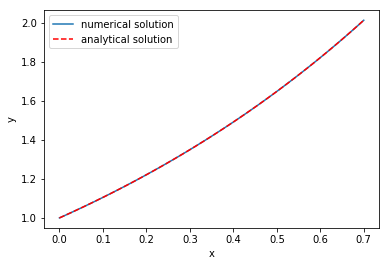

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def dydx(y, t):
    return y

xspan = np.linspace(0, 0.7)
y0 = 1

sol = odeint(dydx, y0, xspan)
print(sol[-1])
plt.plot(xspan, sol)
plt.plot(xspan, np.exp(xspan), 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['numerical solution', 'analytical solution'], loc='best')
plt.show()

Note the use of a dashed line on the second plot so that it is apparent the red dashed line lies on top of the blue line, and the use of the legend to show which line is which.




# Find ODE solutions that hit targets

Let's say that we wanted to find the time at which y crosses 2. One (naive) way to implement this is by wrapping the solver in an fsolve:

In [23]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt


def dydx(y, t):
    return y

def objective(tmax):
    xspan = np.linspace(0, tmax)
    y0 = 1
    sol = odeint(dydx, y0, xspan)
    return sol[-1]-2

sol = fsolve(objective,0.4)

print('The integration reaches 2 at %1.3f'%sol)

The integration reaches 2 at 0.693
